<a href="https://colab.research.google.com/github/cb190/IS_4487/blob/main/Lab_5_Carson_Braswell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day 5 Lab, IS 4487

This lab (like the last one) is designed  to prepare you to complete the project assignment for today. We will go through code (using MegaTelCo as an example) that you will be able to adapt for the AdviseInvest project. Here is what you need to be able to do for the project assignment:

1. Create a plot showing the relationship between a numeric (or count) and a categorical variable.
2. Create a plot showing the relationship between two  categorical variables.


## Load Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Import Data


In [3]:
mtc = pd.read_csv("https://raw.githubusercontent.com/jefftwebb/is_4487_base/dd870389117d5b24eee7417d5378d80496555130/Labs/DataSets/megatelco_leave_survey.csv")

In [4]:
mtc.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,one,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,zero,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,zero,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,one,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,zero,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389


In [5]:
mtc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   college                      5000 non-null   object 
 1   income                       5000 non-null   int64  
 2   overage                      5000 non-null   int64  
 3   leftover                     5000 non-null   int64  
 4   house                        5000 non-null   int64  
 5   handset_price                5000 non-null   int64  
 6   over_15mins_calls_per_month  4997 non-null   float64
 7   average_call_duration        5000 non-null   int64  
 8   reported_satisfaction        5000 non-null   object 
 9   reported_usage_level         5000 non-null   object 
 10  considering_change_of_plan   5000 non-null   object 
 11  leave                        5000 non-null   object 
 12  id                           5000 non-null   int64  
dtypes: float64(1), int

# Prepare Data

1. Perform the cleaning from the previous lab:
   1. Remove negative values of `income` and `house`
   2. Remove absurdly large value of `handset_price`
   3. Remove NAs
   4. Make character variables into categorical variables, including `college` which we will use for to demo the plots. (`college` is coded `one`/`zero`, which is weird, but we'll leave it as is.)

For simplicity, I have added the code that you wrote for the previous lab in the code chunks below.

In [6]:
# filter rows
mtc_clean = mtc[(mtc['house'] > 0) & (mtc['income'] > 0) & (mtc['handset_price'] < 1000)]


In [7]:
# remove NAs
mtc_clean = mtc_clean.dropna()

In [8]:
# Convert string to categorical variables (including college)
mtc_clean['reported_satisfaction'] = mtc_clean['reported_satisfaction'].astype('category')
mtc_clean['reported_usage_level'] = mtc_clean['reported_usage_level'].astype('category')
mtc_clean['considering_change_of_plan'] = mtc_clean['considering_change_of_plan'].astype('category')
mtc_clean['college'] = mtc_clean['college'].astype('category')
mtc_clean['leave'] = mtc_clean['leave'].astype('category')


In [9]:
# check that it worked
mtc_clean.isna().sum()

college                        0
income                         0
overage                        0
leftover                       0
house                          0
handset_price                  0
over_15mins_calls_per_month    0
average_call_duration          0
reported_satisfaction          0
reported_usage_level           0
considering_change_of_plan     0
leave                          0
id                             0
dtype: int64

Note that there are now no NAs; 6 rows have been removed.

In the project you will be directed to change a 0/1 variable into a categorical variable (with labels).  This change helps make plots more legible.  Here is how to do that with pandas, using `college` as an example.  The only difference is that college, weirdly, consists not in 0/1 but in the words "zero" and  "one."

We will use the Pandas `replace()` function to make the change. The syntax is: `Series.replace(to_replace, value)`, where "Series" is the data frame column.

This creates a string variable. The second step is to turn that into a categorical variable.

In [14]:
# Write your code here
mtc_clean['college'] = mtc_clean['college'].replace('zero',"No")
mtc_clean['college'] = mtc_clean['college'].replace('one',"Yes")

In [15]:
mtc_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4994 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   college                      4994 non-null   category
 1   income                       4994 non-null   int64   
 2   overage                      4994 non-null   int64   
 3   leftover                     4994 non-null   int64   
 4   house                        4994 non-null   int64   
 5   handset_price                4994 non-null   int64   
 6   over_15mins_calls_per_month  4994 non-null   float64 
 7   average_call_duration        4994 non-null   int64   
 8   reported_satisfaction        4994 non-null   category
 9   reported_usage_level         4994 non-null   category
 10  considering_change_of_plan   4994 non-null   category
 11  leave                        4994 non-null   category
 12  id                           4994 non-null   int64   
dtypes: categ

In [16]:
# check that it worked:
mtc_clean.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,No,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,Yes,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,No,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389


# Plotting

## 1. Plot the relationship between a numeric and a categorical variable

What, for example, would be the appropriate plot type for showing the relationship between `leave`--our target variable--and `income`? In this case, `leave` is a categorical variable, while `income` is numeric.

- A histogram won't work because it shows the distribution (the frequencies of values) for just a single variable.
- A scatterplot? No.  This will show the relationship between two *numeric* variables.
- A line plot?  This is usually reserved for data that has a time dimension, which is displayed on the horizontal axis.  
- A barplot?  This *could* work.  A summary statistic--mean, median, count, max, min--would be shown on the y-axis, with the categories on the x-axis.

Make a barplot of average income with bars for `LEAVE` and `STAY`. Make sure to add a title as well as axis labels.

Hint:  calculate a conditional mean first, then use that in the plot.

In [17]:
grp_leave = mtc_clean.groupby(['leave'])
grp_leave.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,No,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,Yes,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,No,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
5,No,143987,0,56,896544,778,5.0,1,low,high,yes,STAY,14674
6,Yes,96668,79,24,259329,365,5.0,6,low,avg,yes,LEAVE,19100
7,Yes,50083,0,0,160335,266,5.0,10,low,high,yes,STAY,18170
8,Yes,104392,0,0,247836,778,1.0,8,high,low,no,LEAVE,3201
11,Yes,51516,74,14,661466,271,3.0,5,high,low,no,STAY,13155


In [18]:
mean_leave = grp_leave['income'].mean()
mean_leave

leave
LEAVE    84638.512156
STAY     75292.572051
Name: income, dtype: float64

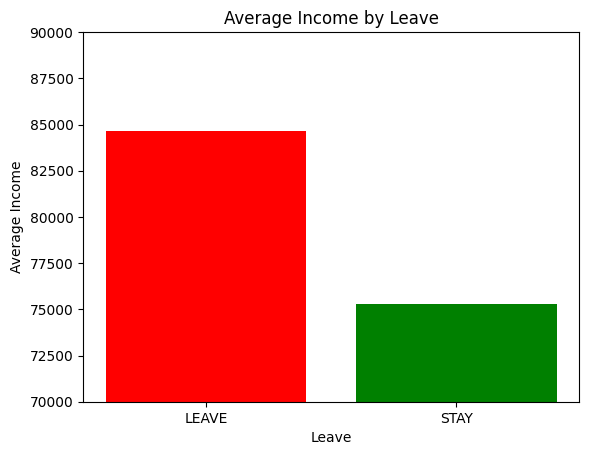

In [21]:
# Your code goes here
plt.bar(mean_leave.index, mean_leave.values, color=['red','green'])
plt.title("Average Income by Leave")
plt.xlabel("Leave")
plt.ylabel("Average Income")

plt.ylim(70000,90000)

plt.show()


## Choose a different summary statistic and add a title

- Update the plot so the bar heights show the median
- Add an appropriate title and axis labels


In [22]:
mtc_clean

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,No,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,Yes,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,No,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,No,93699,26,56,385632,384,5.0,1,high,low,yes,LEAVE,19270
4996,No,25806,67,87,691020,142,4.0,2,high,low,no,STAY,14549
4997,Yes,97033,138,28,710559,311,10.0,2,low,high,yes,STAY,9972
4998,No,91558,229,15,853464,379,27.0,4,high,low,no,STAY,12685


In [23]:
mtc_clean[mtc_clean['leave'] == "STAY"]["income"]

2        30883
4        70535
5       143987
7        50083
11       51516
         ...  
4992     34039
4994    123820
4996     25806
4997     97033
4998     91558
Name: income, Length: 2526, dtype: int64

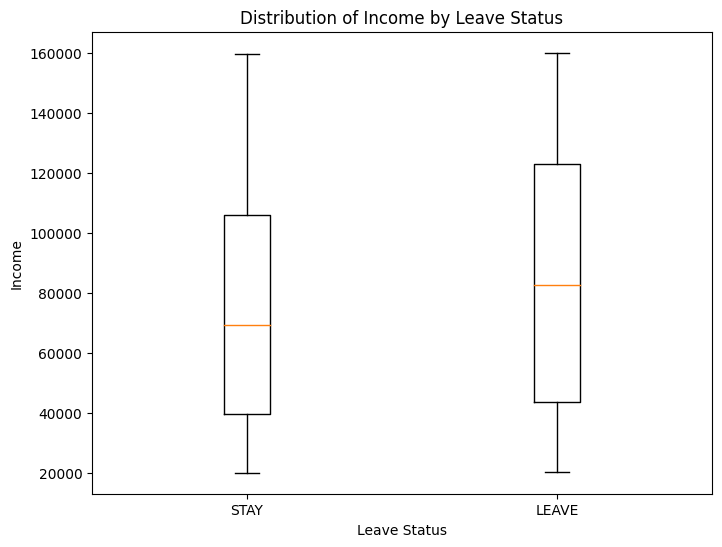

In [24]:
# Write your code here
plt.figure(figsize=(8, 6))
plt.boxplot([mtc_clean[mtc_clean['leave'] == 'STAY']['income'],
             mtc_clean[mtc_clean['leave'] == 'LEAVE']['income']],
            labels=['STAY', 'LEAVE'])

plt.title('Distribution of Income by Leave Status')
plt.xlabel('Leave Status')
plt.ylabel('Income')
plt.show()



What doesn't work very well about this barplot? The information is limited; it does not show the *range* of values. The height of the bar is determined by the summary statistic we've chosen, but gives no information about the *distribution* of observations.

For that, we need a *boxplot*.

Pandas should take an `x` and `y` argument. Instead, it uses `by` and `column`.



In [ ]:
# Write your code here

 This is fine for exploratory work, but is actually pretty bad, in that an extraneous title is added at the top of the plot.

 Do some research and re-create this plot using the Seaborn package. Make sure to add a title. This works a little differently in Seaborn.



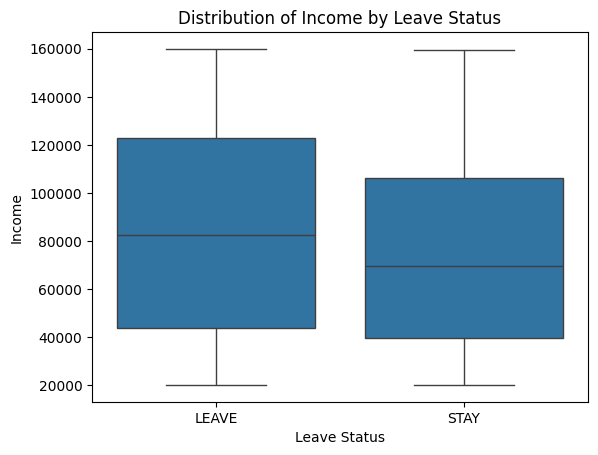

In [26]:
# Your code goes here
sns.boxplot(x='leave', y='income', data=mtc_clean)

plt.title('Distribution of Income by Leave Status')
plt.xlabel('Leave Status')
plt.ylabel('Income')
plt.show()

## 2. Plot the relationship between two categorical variables

This is tricky.  Will a boxplot work to show the relationship between, for example, `college` and `leave`?  No. For a boxplot, one of the variables needs to be numeric.



The best option in this case is a barplot, but some preparatory work is required.

1. Calculate counts of college goers at each level of leave. Use the `count()` function. One detail here is that the output is a grouped series. But the `plot()` function takes a dataframe as input. Therefore you'll need to include the. `unstack()` function to return a dataframe.
2. The height of the bars will then represent those counts.

Input the following prompt into Gemini:  "explain what unstack does and why it is called that."

In [ ]:
# Your code goes here--calculate counts


In [ ]:
mtc_clean.head(2)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501


In [ ]:
grp_college = mtc_clean.groupby(["college","leave"])["leave"].count().unstack()
grp_college

leave,LEAVE,STAY
college,,
Yes,1285,1212
No,1183,1314


<Axes: xlabel='college'>

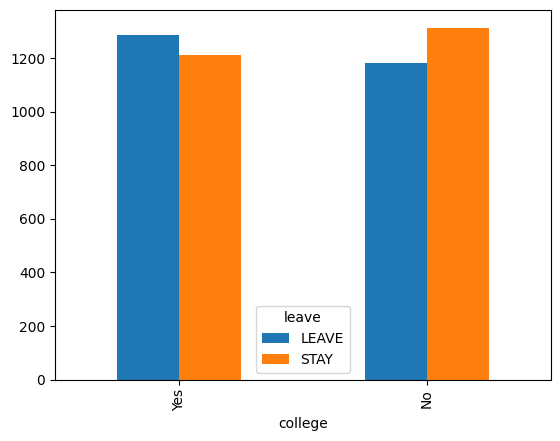

In [ ]:
(mtc_clean.groupby(["college","leave"])["leave"]
.count()
.unstack()
.plot(kind = "bar")
)

Now, the barplot will use the above table of counts:



In [ ]:
# Your code goes here

This plot compares churn rates between college-educated and non-college-educated customers, showing how leaving vs staying changes with education level. In other words, it shows the *impact* of education on churn.

In this case the impact is relatively negligible.

This interpretation will be clearer if we make the y-axis into a *proportion* rather than a *count*.

How would we do this?

We'll use lambda function --  or anonymous function--in conjunction with `apply()`  from pandas.

A lambda function is created on the fly by the analyst:

`lambda arguments: expression`

- **lambda keyword**: Signals the start of a lambda function.

- **arguments**: Zero or more comma-separated arguments that the function takes.

- **expression**: A single expression that is evaluated and returned as the result of the function.

Here is an example:

In [ ]:
square = lambda x: x * x

square(5)

25

Now create a lambda function to  turn a count variable `x` into a proportion.  Calculate the proportion for the following series, `example_series`:

In [ ]:
example_series = pd.Series([20, 18, 5, 77, 100])

example_series


0     20
1     18
2      5
3     77
4    100
dtype: int64

In [ ]:
# Your code goes here
transform = lambda x: (x / x.sum()*100).round(2)
transform(example_series)

0     9.09
1     8.18
2     2.27
3    35.00
4    45.45
dtype: float64

The next task is to change the `leave` variable in the count table into  proportions.  We use `apply()` the apply the lambda function created above to a column.  The syntax is:

`.apply(lambda, axis = 1)`

`axis = 1` means that the function is being applied to  columns.

In [ ]:
(mtc_clean.groupby(["college","leave"])["leave"]
  .count()
  .unstack()
  .apply(lambda x: (x / x.sum()*100).round(2), axis = 1))

leave,LEAVE,STAY
college,,
Yes,51.46,48.54
No,47.38,52.62


In [ ]:
# your  code goes here
mtc_stay = mtc_clean[mtc_clean['leave'] == "STAY"]
mtc_leave = mtc_clean[mtc_clean['leave'] == "LEAVE"]


Next task is to use this proportion table to create a bar plot.

<Axes: title={'center': 'Proportion of Collage Atendies'}, xlabel='College', ylabel='Proportion'>

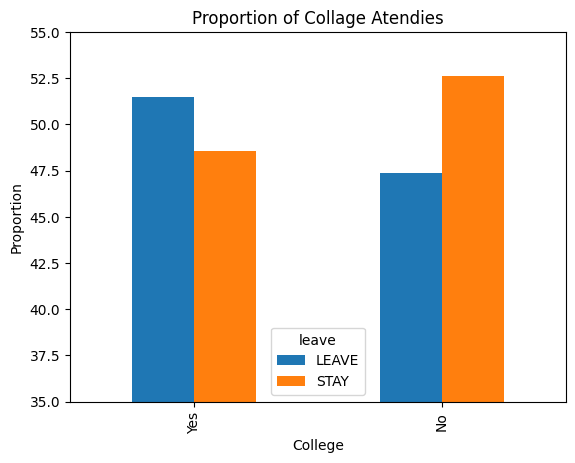

In [ ]:
# Your code goes here--Make the plot
(mtc_clean.groupby(["college","leave"])["leave"]
  .count()
  .unstack()
  .apply(lambda x: (x / x.sum()*100).round(2), axis = 1)
  .plot(kind = "bar", ylim=(35,55), title="Proportion of Collage Atendies", xlabel="College", ylabel="Proportion"))

 Fine-tune your plot

1. Add a title
2. Add an appropriate y-axis label.

In [ ]:
# Write your code here
## See above

## More practice with plots

Recreate the plots from the lecture:

1. A plot asnwering the question "is churn related to wealth"?
2. Display the distribution of house prices by churn status
3. Is churn related to phone usage?
4. Is churn related to satisfaction?

Make a brief comment on the meaning of the plot for understanding churn.



In [ ]:
# Write your code here
mtc_clean.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,No,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,Yes,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,No,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389


In [ ]:
grp_income = mtc_clean.groupby(["leave"])["income"].mean()
grp_income

leave
LEAVE    84638.512156
STAY     75292.572051
Name: income, dtype: float64

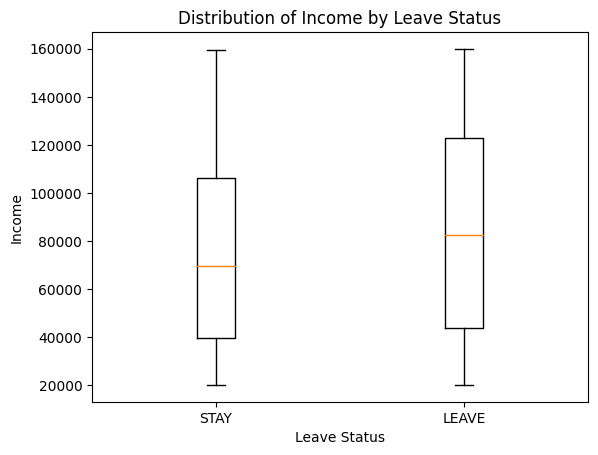

In [ ]:
plt.boxplot([mtc_clean[mtc_clean['leave'] == 'STAY']['income'],
             mtc_clean[mtc_clean['leave'] == 'LEAVE']['income']],
            labels=['STAY', 'LEAVE'])
plt.title('Distribution of Income by Leave Status')
plt.xlabel('Leave Status')
plt.ylabel('Income')
plt.show()

In [ ]:
# Write your code here
grp_income = mtc_clean.groupby(["leave"])["house"].mean()
grp_income

leave
LEAVE    439039.818882
STAY     547591.969121
Name: house, dtype: float64

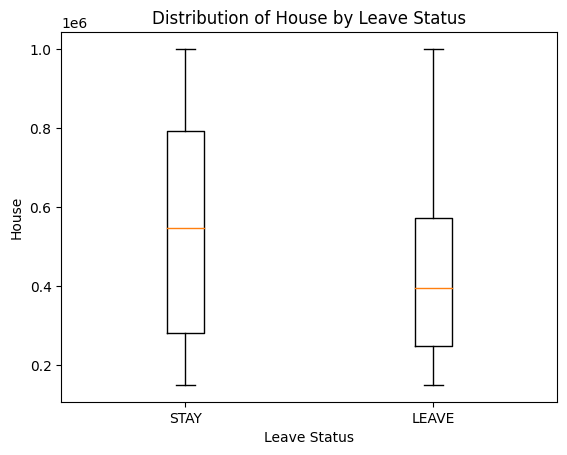

In [ ]:
plt.boxplot([mtc_clean[mtc_clean['leave'] == 'STAY']['house'],
             mtc_clean[mtc_clean['leave'] == 'LEAVE']['house']],
            labels=['STAY', 'LEAVE'])
plt.title('Distribution of House by Leave Status')
plt.xlabel('Leave Status')
plt.ylabel('House')
plt.show()

In [ ]:
# Write your code here


<Axes: title={'center': 'Proportion of Phone Usage Levels'}, xlabel='Phone Usage', ylabel='Proportion'>

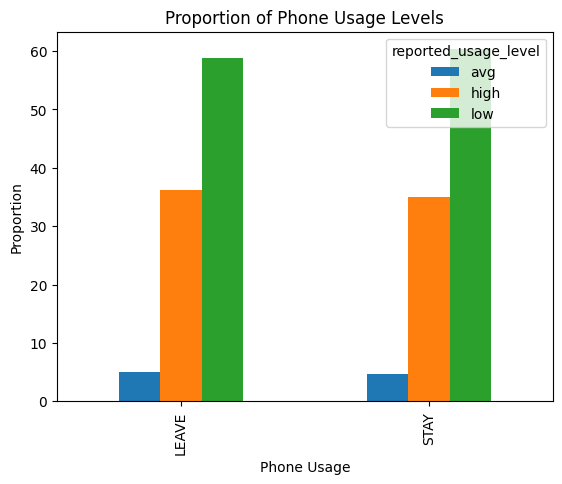

In [ ]:
(mtc_clean.groupby(["leave","reported_usage_level"])["reported_usage_level"]
 .count()
 .unstack()
 .apply(lambda x: (x / x.sum()*100).round(2), axis = 1)
 .plot(kind = "bar", title="Proportion of Phone Usage Levels", xlabel="Phone Usage", ylabel="Proportion"))

This graph shows that the amount of reported usage doesn't predect wheather or not a customer will stay or leave. It does show however that there is a much larger pool of customer whohave high and low usage levels, irespective of whether they stay or leave.

In [ ]:
# Write your code here Churn and Satisfaction
mtc_clean.head(2)

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501


<Axes: title={'center': 'Proportion of Satisfaction Levels'}, xlabel='Satisfaction', ylabel='Proportion'>

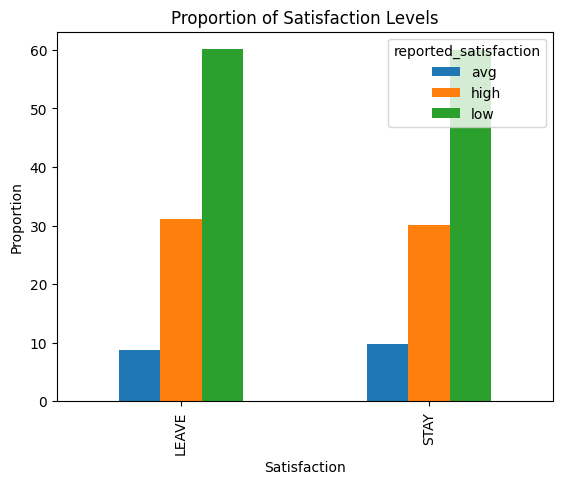

In [ ]:
(mtc_clean.groupby(["leave","reported_satisfaction"])["leave"]
 .count()
 .unstack()
 .apply(lambda x: (x / x.sum()*100).round(2), axis = 1)
 .plot(kind = "bar", title="Proportion of Satisfaction Levels", xlabel="Satisfaction", ylabel="Proportion"))


## EDA

Think about the drivers of churn.  Pose another question about what might cause customer churn and create a plot to answer that question. Make sure to comment on the meaning of the plot for understanding churn.

In [ ]:
# Code for your plot goes here
mtc_clean.head()

,college,income,overage,leftover,house,handset_price,over_15mins_calls_per_month,average_call_duration,reported_satisfaction,reported_usage_level,considering_change_of_plan,leave,id
0,Yes,23859,70,0,519105,154,5.0,8,low,low,yes,LEAVE,8183
1,No,72466,67,16,271182,262,5.0,5,low,low,yes,LEAVE,12501
2,No,30883,60,0,647281,211,3.0,8,low,low,yes,STAY,7425
3,Yes,44512,0,22,754958,232,0.0,5,low,low,no,LEAVE,13488
4,No,70535,0,0,653421,310,0.0,14,low,low,yes,STAY,11389


<Axes: title={'center': 'Proportion of Change of Plan'}, xlabel='Change of Plan', ylabel='Proportion'>

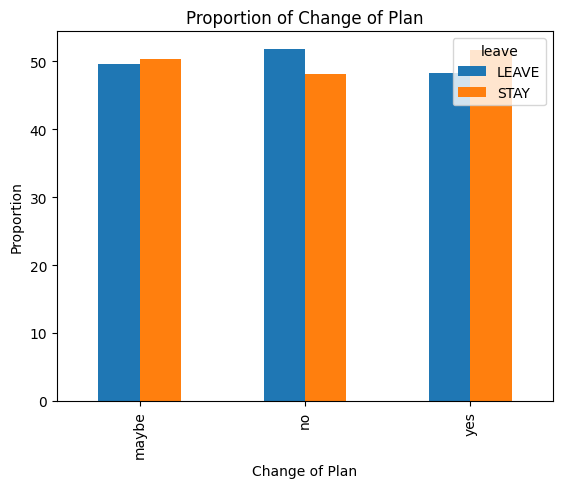

In [ ]:
(mtc_clean.groupby(["considering_change_of_plan", "leave"])['leave']
.count()
.unstack()
.apply(lambda x: (x / x.sum()*100).round(2), axis = 1)
.plot(kind = "bar", title="Proportion of Change of Plan", xlabel="Change of Plan", ylabel="Proportion"))

This graph shows that there wheather or not someone is considering changing their plan isn't a predictor of Churn. If cusotmers are considering chaning their plan, will change, or wont, they have a 50% chance of churning.

# Functions:

- `pd.read_csv()`: Reads a CSV file into a pandas DataFrame.
- `.info()`: Prints a concise summary of a DataFrame, including column names, non-null counts, and data types.
- `.dropna()`: Removes rows with missing values from a DataFrame.
- `.astype()`: Casts a pandas object to a specified dtype.
- `.groupby()`: Groups DataFrame using a mapper or by a Series of columns.
- `.mean()`: Returns the mean of the values for the requested axis.
- `.plot()`: Creates a plot of the data in a DataFrame or Series.
- `.median()`: Returns the median of the values for the requested axis.
- `.count()`: Counts non-null values in a Series or DataFrame.
- `.unstack()`: Pivots a level of the index labels.
- `.apply()`: Applies a function along an axis of the DataFrame.
- `lambda`: Creates an anonymous function.
- `sum()`: Returns the sum of a Series or DataFrame elements.